In [1]:
import tensorflow as tf
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential,Model,initializers,layers,Input
from tensorflow.keras.utils import plot_model
import os
import matplotlib.pyplot as plt

In [2]:
dir=r'D:\dataset\butterfly\train'

In [3]:
walk=os.walk(dir)
walk=list(walk)
walk
# image_count = []
# for (root, dirs, files) in os.walk(dir):

#     if len(files) > 0:
#         for file_name in files:
#             # print("file: " + file_name)
#             save_file_name = os.path.join(root, file_name)
#             image_count.append(save_file_name)

# print(len(image_count))
# image_count[0]



[('D:\\dataset\\butterfly\\train',
  ['ADONIS',
   'AFRICAN GIANT SWALLOWTAIL',
   'AMERICAN SNOOT',
   'AN 88',
   'APPOLLO',
   'ARCIGERA FLOWER MOTH',
   'ATALA',
   'ATLAS MOTH',
   'BANDED ORANGE HELICONIAN',
   'BANDED PEACOCK'],
  []),
 ('D:\\dataset\\butterfly\\train\\ADONIS',
  [],
  ['01.jpg',
   '02.jpg',
   '03.jpg',
   '04.jpg',
   '05.jpg',
   '06.jpg',
   '07.jpg',
   '08.jpg',
   '09.jpg',
   '10.jpg',
   '100.jpg',
   '101.jpg',
   '102.jpg',
   '103.jpg',
   '104.jpg',
   '105.jpg',
   '106.jpg',
   '107.jpg',
   '108.jpg',
   '109.jpg',
   '11.jpg',
   '110.jpg',
   '111.jpg',
   '112.jpg',
   '113.jpg',
   '114.jpg',
   '115.jpg',
   '116.jpg',
   '117.jpg',
   '118.jpg',
   '119.jpg',
   '12.jpg',
   '120.jpg',
   '121.jpg',
   '122.jpg',
   '123.jpg',
   '124.jpg',
   '125.jpg',
   '126.jpg',
   '127.jpg',
   '13.jpg',
   '14.jpg',
   '15.jpg',
   '16.jpg',
   '17.jpg',
   '18.jpg',
   '19.jpg',
   '20.jpg',
   '21.jpg',
   '23.jpg',
   '24.jpg',
   '25.jpg',
   '

In [4]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
dir,
labels="inferred",
label_mode="int",
class_names=None,
color_mode="rgb",
batch_size=32,
image_size=(112, 112),
shuffle=True,
seed=10,
validation_split=0.1,
subset='training',
interpolation="gaussian",
follow_links=False,
crop_to_aspect_ratio=False,)

Found 1257 files belonging to 10 classes.
Using 1132 files for training.


In [5]:
validation_ds=tf.keras.preprocessing.image_dataset_from_directory(
dir,
validation_split=0.1,
subset='validation',
shuffle=True,
seed=10,
image_size=(224,224),
batch_size=32)

Found 1257 files belonging to 10 classes.
Using 125 files for validation.


In [5]:
train_ds1=list(train_ds)
train_ds1

[(<tf.Tensor: shape=(32, 224, 224, 3), dtype=float32, numpy=
  array([[[[213.9982   , 214.99818  , 198.9982   ],
           [212.21458  , 213.32109  , 197.53409  ],
           [217.90456  , 219.79807  , 205.58505  ],
           ...,
           [ 35.73126  ,  33.21142  ,  12.743957 ],
           [ 35.106503 ,  30.50714  ,   8.54523  ],
           [ 34.553383 ,  30.329185 ,   6.030197 ]],
  
          [[210.65666  , 211.65666  , 195.86966  ],
           [211.54387  , 212.63902  , 197.04234  ],
           [217.54291  , 219.3526   , 205.16225  ],
           ...,
           [ 33.715927 ,  30.609419 ,  11.727274 ],
           [ 35.098152 ,  30.52418  ,  10.333857 ],
           [ 36.53429  ,  31.841114 ,  10.066828 ]],
  
          [[211.08887  , 212.08887  , 197.87582  ],
           [210.4457   , 211.45705  , 197.26671  ],
           [211.95996  , 213.13895  , 199.11626  ],
           ...,
           [ 31.532532 ,  28.475813 ,  11.498502 ],
           [ 29.924528 ,  26.7342   ,   8.21002  ],

In [6]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255.)

In [7]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

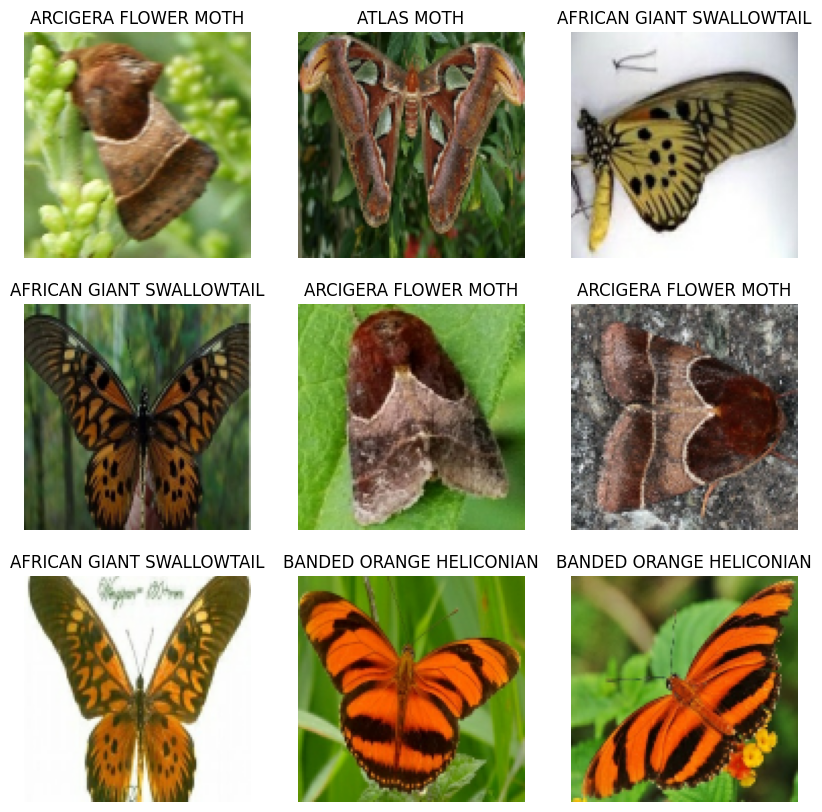

In [8]:
import matplotlib.pyplot as plt  
plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")

In [14]:
def Convblock(x,k):
    x1=layers.BatchNormalization()(x)
    x1=layers.ReLU()(x1)
    x1=layers.Conv2D(filters=4*k,kernel_size=(1,1),strides=(1,1),padding='same')(x1)
    
    x1=layers.BatchNormalization()(x1)
    x1=layers.ReLU()(x1)
    x1=layers.Conv2D(filters=k,kernel_size=(3,3),strides=(1,1),padding='same')(x1)
    
    x2=tf.keras.layers.Concatenate()([x,x1])

    return x2

def DenseBlock_1(x,k):
    for i in range(6):
        x_temp=Convblock(x,k)
        x=x_temp
    return x

def DenseBlock_2(x,k):
    for i in range(12):
        x_temp=Convblock(x,k)
        x=x_temp
    return x

def DenseBlock_3(x,k):
    for i in range(48):
        x_temp=Convblock(x,k)
        x=x_temp
    return x

def DenseBlock_4(x,k):
    for i in range(32):
        x_temp=Convblock(x,k)
        x=x_temp
    return x

# def Transition_layer(x,k,theta):
#     x=layers.BatchNormalization()(x)
#     x=layers.ReLU()(x)
#     x=layers.Conv2D(filters=(256+3*k)*theta,kernel_size=(1,1),use_bias=False,strides=(1,1),padding='same',)(x)
#     x=layers.AveragePooling2D(pool_size=(2,2),strides=(2,2))(x)
#     return x

def Transition_layer(x,k):
    x=layers.BatchNormalization()(x)
    x=layers.ReLU()(x)
    x=layers.Conv2D(filters=k,kernel_size=(1,1),use_bias=False,strides=(1,1),padding='same',)(x)
    x=layers.AveragePooling2D(pool_size=(2,2),strides=(2,2))(x)
    return x

def Classifier(x,num_claases):
    x=layers.GlobalAveragePooling2D()(x)
    x=layers.Dense(units=num_claases,activation='softmax')(x) 
    return x

In [15]:
input=Input(shape=(224,224,3))
x=layers.Conv2D(filters=64,kernel_size=(7,7),strides=(2,2),padding='same')(input)
x=layers.BatchNormalization()(x)
x=layers.ReLU()(x)
x=layers.MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(x)
print(x.shape)


x=DenseBlock_1(x,32)
print(x.shape)
x=Transition_layer(x,128)   #filters=128      32,0.5
print(x.shape)

x=DenseBlock_2(x,32)
print(x.shape)
x=Transition_layer(x,256)  #filters=256
print(x.shape)

x=DenseBlock_3(x,32)
print(x.shape)
x=Transition_layer(x,896) #filters=896  k값에 512들어감
print(x.shape)

x=DenseBlock_4(x,32)
print(x.shape)

output=Classifier(x,1000)

model = tf.keras.models.Model(input,output)

(None, 56, 56, 64)
(None, 56, 56, 256)
(None, 28, 28, 128)
(None, 28, 28, 512)
(None, 14, 14, 256)
(None, 14, 14, 1792)
(None, 7, 7, 896)
(None, 7, 7, 1920)


In [17]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_813 (Conv2D)            (None, 112, 112, 64  9472        ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_813 (Batch  (None, 112, 112, 64  256        ['conv2d_813[0][0]']             
 Normalization)                 )                                                           

In [4]:
len(model.layers)
#ReLU레이어 제외시 507개 레이어

705

In [ ]:
plot_model(model,to_file='DenseNet.png',show_shapes=True)

In [11]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy' ,metrics=['acc'])

In [ ]:
with tf.device("/device:GPU:0"):
    history=model.fit(train_ds,validation_data=validation_ds,epochs=100,batch_size=16,verbose=1)

In [ ]:
dir=r'D:\dataset\butterfly\train'
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
dir,
labels="inferred",
label_mode="categorical",
class_names=None,
color_mode="rgb",
batch_size=16,
image_size=(224, 224),
shuffle=True,
seed=10,
validation_split=0.1,
subset='training',
interpolation="gaussian",
follow_links=False,
crop_to_aspect_ratio=False,)


validation_ds=tf.keras.preprocessing.image_dataset_from_directory(
dir,
labels="inferred",
label_mode="categorical",
class_names=None,
color_mode="rgb",
batch_size=16,
image_size=(224, 224),
shuffle=True,
seed=10,
validation_split=0.1,
subset='validation',
interpolation="gaussian",
follow_links=False,
crop_to_aspect_ratio=False,)

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255.)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

model_checkpoint_best_path=r'D:\GitHub_repo\CNN-Model-Application\save_weights\yblock/'
model_checkpoint_best=ModelCheckpoint(filepath=model_checkpoint_best_path,monitor='val_acc',save_best_only=True,save_weights_only=True,save_freq='epoch')
early_stopping=EarlyStopping(monitor='val_acc',patience=30,min_delta=1e-4)


lr_rate=tf.keras.optimizers.schedules.ExponentialDecay(1e-3, 10000, 0.97, staircase=False, name=None)

    
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_rate),loss='categorical_crossentropy',metrics=['acc',tf.keras.metrics.Precision(name='precision')\
                          ,tf.keras.metrics.Recall(name='recall')],)

history=model.fit(train_ds,validation_data=validation_ds,epochs=100,batch_size=16,verbose=1,callbacks=[model_checkpoint_best])